In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as funct
from torchvision import datasets ,transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline 


In [2]:
#convert mnist images into 4dimensional tensors (images_count , height, width,color channel)
transform = transforms.ToTensor()


In [3]:
train_data = datasets.MNIST(root="D:/Neural Networks/mnist/",train=True,download=True,transform=transform)

In [4]:
test_data = datasets.MNIST(root="/",train=False,download=True,transform=transform)

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: D:/Neural Networks/mnist/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
train_loader = DataLoader(train_data,batch_size=10,shuffle=True)

In [8]:
test_loader = DataLoader(test_data,batch_size=10,shuffle=False)

In [19]:
#Defining the convolutional neural layer
#(uses) 2 convolution layers and a pooling layer

conv1 =nn.Conv2d(1,6,3,1)
conv2 =nn.Conv2d(6,16,3,1)
 

In [20]:
#grab 1 of the images

for i,(x_train,y_train) in enumerate(train_data):
    break

In [25]:
print(x_train)
print(y_train)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [26]:
x = x_train.view(1,1,28,28)#1 batch ,1 color  , 28 * 28 px image

In [27]:
x=funct.relu(conv1(x))
x.shape

torch.Size([1, 6, 26, 26])

In [14]:
y_train

5

In [28]:
x=funct.max_pool2d(x,kernel_size= 2,stride= 2)#kernel size 2 stride size 2 and 26/2 is 13 

In [29]:
x.shape

torch.Size([1, 6, 13, 13])

In [30]:
x=funct.relu(conv2(x))

In [31]:
x.shape


torch.Size([1, 16, 11, 11])

In [32]:
x=funct.max_pool2d(x,2,2)#kernel 2 stride 2 and 11/2 = round down to 5


In [33]:
x.shape


torch.Size([1, 16, 5, 5])

In [34]:
#model class ,the architecture 
class Cnn_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        #these make up only the feature extraction part , so we need to build a fully connected layer
        self.fc1 = nn.Linear(5*5*16,150)
        self.fc2 = nn.Linear(150,86)
        self.fc3 = nn.Linear(86,10)

    def forward(self,x):
        x = funct.relu(self.conv1(x))
        x = funct.max_pool2d(x,2,2)
        x = funct.relu(self.conv2(x))
        x = funct.max_pool2d(x,2,2)

        # review to flatten it out
        x = x.view(-1,16*5*5) #-1 so that we can increase the batch size later

        #fully connected layers
        x = funct.relu(self.fc1(x))
        x = funct.relu(self.fc2(x))
        x = self.fc3(x)

        return funct.log_softmax(x,dim=1)



In [38]:
torch.manual_seed(41)

model = Cnn_model()
print(*model.parameters())

Parameter containing:
tensor([[[[-0.1757, -0.1823,  0.2004],
          [-0.2205, -0.1567,  0.1813],
          [-0.2479,  0.1635,  0.2030]]],


        [[[ 0.0905,  0.0597,  0.1289],
          [ 0.2522,  0.0271, -0.2400],
          [ 0.3076,  0.2444, -0.0077]]],


        [[[-0.1949, -0.1291, -0.2943],
          [ 0.2209, -0.0289,  0.2297],
          [ 0.1255, -0.0661, -0.2131]]],


        [[[ 0.1160, -0.2139, -0.0741],
          [ 0.1982, -0.1815, -0.0163],
          [-0.0452,  0.0382,  0.3209]]],


        [[[ 0.1949, -0.1252,  0.2950],
          [-0.1084,  0.1373,  0.1379],
          [-0.0101, -0.3102,  0.3134]]],


        [[[-0.0770,  0.2270, -0.1999],
          [-0.0340,  0.2858, -0.2892],
          [ 0.0129, -0.0043, -0.2849]]]], requires_grad=True) Parameter containing:
tensor([-0.0646, -0.3055,  0.0720,  0.0561,  0.1907,  0.0083],
       requires_grad=True) Parameter containing:
tensor([[[[-0.0548, -0.0491, -0.0508],
          [ 0.1059,  0.0436, -0.1355],
          [ 0.0243, -

In [41]:
#loss function optimizer
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters() , lr = 0.001 )


In [42]:
import time
starttime = time.time()

#epochs setting , and loss and correct trackers
epochs = 5

train_losses=[]
test_losses=[]
train_correct =[]
test_correct=[]

#training process

for i in range(epochs):
    train_crt = 0
    test_crt = 0
    #training 
    for batches,(X_train,Y_train) in enumerate(train_loader):
        batches+=1 #batch count
        y_pred = model(X_train)
        loss = criterion(y_pred,Y_train) #comparing the original with predicted value and y_train

        predicted = torch.max(y_pred.data,1)[1]#we get indices of the maximum value among y_pred
        batch_correct = (predicted == Y_train).sum()#how many predictions were right
        ##print(predicted)
        #print(f'Y_train is {Y_train}')
        train_crt+=batch_correct
        #update the parameters

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #printing some results out

        if batches%600 == 0:
            print(f'epochs:{i} batch_count: {batches} loss :{loss}')

    train_losses.append(loss)
    train_correct.append(train_crt)
 
 #testing 
    with torch.no_grad():
        for b,(X_test,Y_test) in enumerate(test_loader):
            y_val = model(X_test)
            predicted = torch.max(y_val.data,1)[1]#getting the repdicted score
            test_crt += (y_val == Y_test).sum()

    loss = criterion(y_val,Y_test)
    test_losses.append(loss)
    test_correct.append(test_crt)


endtime = time.time()
print(f'time consumed{(endtime-starttime)/60} minutes')
    

epochs:0 batch_count: 600 loss :0.25386929512023926
epochs:0 batch_count: 1200 loss :0.04041116684675217
epochs:0 batch_count: 1800 loss :0.49461430311203003
epochs:0 batch_count: 2400 loss :0.21529677510261536
epochs:0 batch_count: 3000 loss :0.07800884544849396
epochs:0 batch_count: 3600 loss :0.0034687183797359467
epochs:0 batch_count: 4200 loss :0.27178627252578735
epochs:0 batch_count: 4800 loss :0.0005080942646600306
epochs:0 batch_count: 5400 loss :0.14082227647304535
epochs:0 batch_count: 6000 loss :0.0006517668371088803
epochs:1 batch_count: 600 loss :0.09464215487241745
epochs:1 batch_count: 1200 loss :0.03341742977499962
epochs:1 batch_count: 1800 loss :0.010217157192528248
epochs:1 batch_count: 2400 loss :0.18331345915794373
epochs:1 batch_count: 3000 loss :0.007273899856954813
epochs:1 batch_count: 3600 loss :0.000506277137901634
epochs:1 batch_count: 4200 loss :0.015914153307676315
epochs:1 batch_count: 4800 loss :0.011213788762688637
epochs:1 batch_count: 5400 loss :0.04

In [45]:
train_correct

[tensor(56635), tensor(58887), tensor(59201), tensor(59336), tensor(59500)]

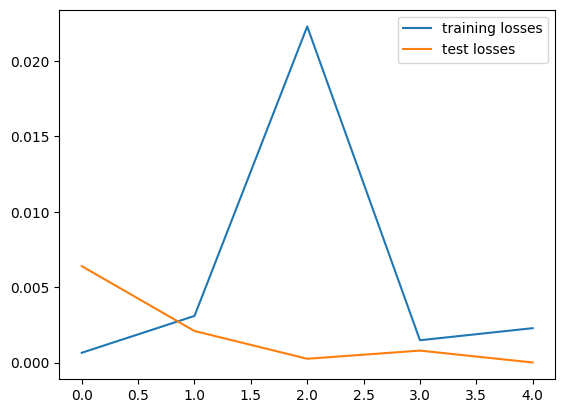

In [46]:
#visualizing the losses and correctness , i.e is validating
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses,label="training losses")
plt.plot(test_losses,label="test losses")
plt.legend()


Text(0.5, 1.0, 'accuracy after every epoch')

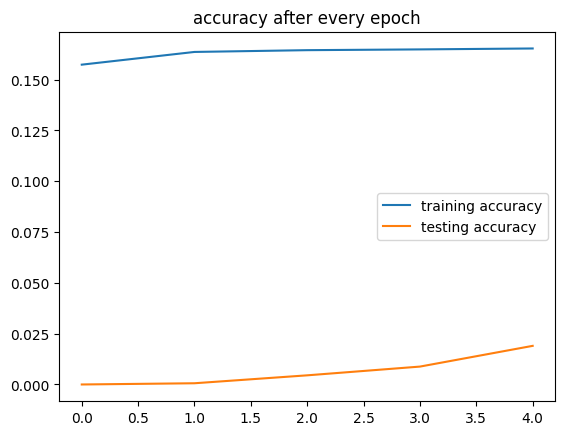

In [48]:
train_correct = [t/600 for t in train_correct]
test_correct = [t/100 for t in test_correct]
plt.plot(train_correct,label="training accuracy")
plt.plot(test_correct,label="testing accuracy") 
plt.legend()
plt.title("accuracy after every epoch")

In [49]:
test_load_all = DataLoader(test_data,batch_size=10000,shuffle=False)

with torch.no_grad():
    guessed_right=0
    for x_test,y_test in test_load_all:
        y_value = model(x_test)
        loss_seen = criterion(y_value,y_test)
        print(f"loss seen is{loss_seen}")
        predicted = torch.max(y_value,1)[1]
        guessed_right+=(predicted==y_test).sum()
        print(guessed_right/len(test_data)*100)



loss seen is0.039930976927280426
tensor(98.8000)


In [54]:
#testing for a new image
test_data[2321][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1765,
         0.4745, 0.8863, 0.9922, 0.5569, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2118,
         0.5686, 0.5686, 0.8784, 0.8980, 0.1529, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [79]:
test_data[2321][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1765,
         0.4745, 0.8863, 0.9922, 0.5569, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2118,
         0.5686, 0.5686, 0.8784, 0.8980, 0.1529, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

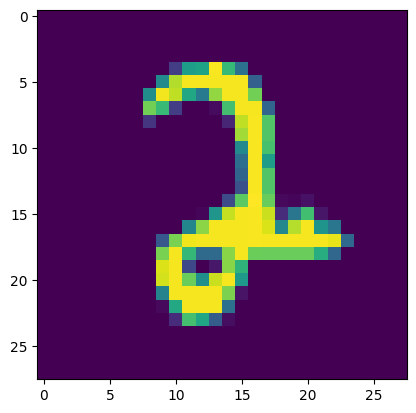

In [55]:
plt.imshow(test_data[2311][0].reshape(28,28))

In [60]:
model.eval() #model.eval() is used for evaluation once the mdoel is built
with torch.no_grad():
    new_prediction = model(test_data[2311][0].view(1,1,28,28)) #meaning 1 batch ,1 channel , 28*28 sized image
new_prediction.detach().numpy().argmax()

2

In [61]:
torch.save(model.state_dict(),"number_classifier.pt")

In [64]:
print(model.state_dict())

OrderedDict([('conv1.weight', tensor([[[[-0.3604, -0.3008,  0.2482],
          [-0.7962, -0.0842,  0.4200],
          [-0.1334,  0.4837,  0.4036]]],


        [[[ 0.0718,  0.0542,  0.0994],
          [ 0.1906,  0.2053, -0.0898],
          [ 0.2294,  0.3719,  0.1026]]],


        [[[-0.4084, -0.5061, -0.4730],
          [ 0.2661,  0.0470,  0.4224],
          [ 0.2973,  0.2091,  0.0287]]],


        [[[ 0.2735, -0.3432, -0.4078],
          [ 0.2945, -0.1581, -0.1651],
          [ 0.0993,  0.3268,  0.4083]]],


        [[[ 0.0791, -0.0655,  0.0025],
          [-0.0886,  0.3617,  0.2968],
          [-0.3615, -0.4505,  0.1912]]],


        [[[-0.0365,  0.3483, -0.1765],
          [ 0.2243,  0.4334, -0.4596],
          [ 0.1606, -0.0582, -0.5797]]]])), ('conv1.bias', tensor([-0.1530, -0.4566,  0.0196, -0.2041, -0.0440, -0.0344])), ('conv2.weight', tensor([[[[-0.3651, -0.2681,  0.1131],
          [-0.2849,  0.0586,  0.1771],
          [-0.0534,  0.0951,  0.2662]],

         [[ 0.1218,  0.0545